In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from IPython.display import HTML

# Center all plots
HTML("<style>.output_png {display: block; margin: auto;}</style>")

# Set a consistent default figure size
plt.rcParams['figure.figsize'] = (6, 4)  # width=6, height=4 inches

In [3]:
# Load train and test data
train = pd.read_csv("/kaggle/input/playground-series-s5e9/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e9/test.csv")
train.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [4]:
# Check data structure
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print("\nFirst 5 rows of train data:")
display(train.head())

Train shape: (524164, 11)
Test shape: (174722, 10)

First 5 rows of train data:


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


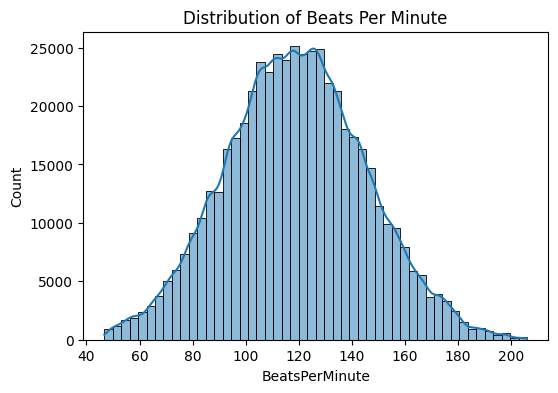

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Target distribution
plt.figure()
sns.histplot(train["BeatsPerMinute"], bins=50, kde=True)
plt.title("Distribution of Beats Per Minute")
plt.show()

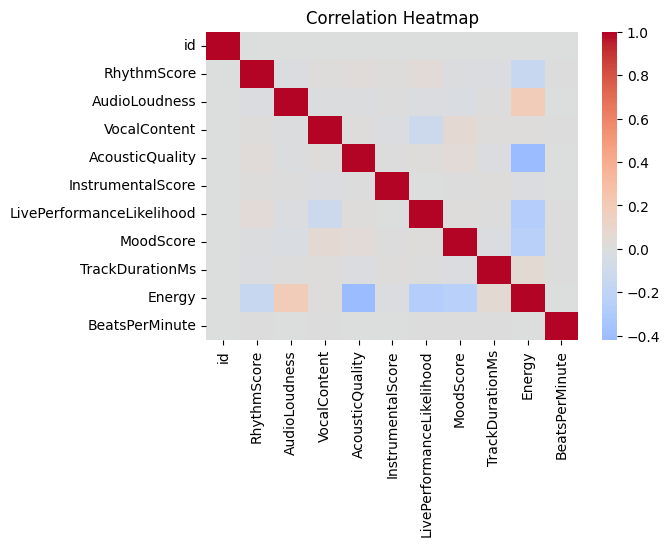

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Correlation check
plt.figure()
sns.heatmap(train.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Random Forest Model

## 1. Data Preprocessing

In [7]:
# Prepare features
X = train.drop(["id","BeatsPerMinute"], axis=1)
y = train["BeatsPerMinute"]
X_test = test.drop("id", axis=1)

In [8]:
# Train/Validation split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 2. Model Formulation

In [9]:
# Random Forest model
model = RandomForestRegressor(
    n_estimators=100,   # limited trees
    max_depth=12,       # cap depth (prevents overfitting + speeds up)
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_jobs=-1, random_state=42)

## 3. Model Evaluation

In [10]:
# Evaluate on validation set
y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 26.442551630139153


# Submission

In [11]:
# Train on full data
model.fit(X, y)

RandomForestRegressor(max_depth=12, n_jobs=-1, random_state=42)

In [13]:
# Make predictions
test_preds = model.predict(X_test)

In [14]:
# Create submission file df
submission = pd.DataFrame({
    "id": test["id"],
    "BeatsPerMinute": test_preds
})

# Create csv
submission.to_csv("submission.csv", index=False)
print("Submission file created:", submission.shape)
print(submission.head())

Submission file created: (174722, 2)
       id  BeatsPerMinute
0  524164      119.082105
1  524165      118.616579
2  524166      119.446301
3  524167      119.259128
4  524168      119.468665
